In [1]:
import numpy as np
import pandas as pd

In [2]:
cctv_seoul = pd.read_excel('data/cctv_seoul.xlsx')

In [3]:
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [4]:
pop_seoul = pd.read_csv('data/population_seoul.txt', sep='\t', header=2, thousands=",")

In [5]:
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2019.3/4,합계,4315921,10025927,4887068,5138859,9740398,4751696,4988702,285529,135372,150157,2.26,1468146
1,2019.3/4,종로구,73942,162860,78523,84337,151767,73952,77815,11093,4571,6522,2.05,27394
2,2019.3/4,중구,62593,136663,67030,69633,126409,62161,64248,10254,4869,5385,2.02,23025
3,2019.3/4,용산구,109911,244989,119499,125490,228830,110478,118352,16159,9021,7138,2.08,38531
4,2019.3/4,성동구,136466,311290,152134,159156,303158,148510,154648,8132,3624,4508,2.22,43662


In [6]:
# pop_seoul = pop_seoul.rename(columns={pop_seoul.columns[1]: '구별'})
pop_seoul.rename(columns={pop_seoul.columns[1]: '구별'}, inplace=True)
pop_seoul.head(2)

,기간,구별,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2019.3/4,합계,4315921,10025927,4887068,5138859,9740398,4751696,4988702,285529,135372,150157,2.26,1468146
1,2019.3/4,종로구,73942,162860,78523,84337,151767,73952,77815,11093,4571,6522,2.05,27394


In [7]:
pop_seoul.head(2)

,기간,구별,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2019.3/4,합계,4315921,10025927,4887068,5138859,9740398,4751696,4988702,285529,135372,150157,2.26,1468146
1,2019.3/4,종로구,73942,162860,78523,84337,151767,73952,77815,11093,4571,6522,2.05,27394


In [8]:
columnnames = list(cctv_seoul.columns)
columnnames[0] = '구별'
cctv_seoul.columns = columnnames
cctv_seoul.head(2)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385


In [9]:
cctv_seoul['구별'][1]

'강 동 구'

In [10]:
pop_seoul['구별'][1]

'종로구'

In [11]:
def delete_space(x):
    new_str = ""
    
    for i in x:
        if not i == ' ':
            new_str +=i
            
    return new_str


In [12]:
cctv_seoul['구별'].apply(lambda x:x.replace(" ", ""))
cctv_seoul['구별'].apply(delete_space)
cctv_seoul['구별'] = \
cctv_seoul['구별'].apply(lambda x: "".join(x.split(" ")))

In [13]:
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [14]:
pop_seoul = pop_seoul[["구별", "계", "계.1", "계.2", "65세이상고령자"]]
pop_seoul.head()

,구별,계,계.1,계.2,65세이상고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


In [15]:
pop_columns = ["구별", "인구수", "한국인", "외국인", "고령자"]
pop_seoul.columns = pop_columns
pop_seoul.head(2)

,구별,인구수,한국인,외국인,고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394


In [16]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
구별          25 non-null object
소계          25 non-null int64
2011년 이전    23 non-null float64
2012년       23 non-null float64
2013년       23 non-null float64
2014년       25 non-null int64
2015년       25 non-null int64
2016년       25 non-null int64
2017년       25 non-null int64
2018년       25 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [17]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10025927,9740398,285529,1468146
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662


In [18]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 5 columns):
구별     26 non-null object
인구수    26 non-null int64
한국인    26 non-null int64
외국인    26 non-null int64
고령자    26 non-null int64
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [19]:
cctv_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
구별          25 non-null object
소계          25 non-null int64
2011년 이전    23 non-null float64
2012년       23 non-null float64
2013년       23 non-null float64
2014년       25 non-null int64
2015년       25 non-null int64
2016년       25 non-null int64
2017년       25 non-null int64
2018년       25 non-null int64
dtypes: float64(3), int64(6), object(1)
memory usage: 2.1+ KB


In [20]:
cctv_seoul.sort_values(by="소계", ascending=False).head(5)

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


In [21]:
cctv_seoul['최근증가율'] = cctv_seoul.loc[:, "2015년": "2018년"].sum(axis=1)/ \
cctv_seoul.loc[:, "2011년 이전" : "2014년"].sum(axis=1) * 100

cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,80.970537
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,112.797282
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,131.684982
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,123.961219
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,186.278736


In [22]:
pop_seoul = pop_seoul.drop([0])
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162860,151767,11093,27394
2,중구,136663,126409,10254,23025
3,용산구,244989,228830,16159,38531
4,성동구,311290,303158,8132,43662
5,광진구,368337,352692,15645,47347


In [23]:
pop_seoul['외국인비율'] = pop_seoul['외국인'] / pop_seoul['인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul['고령자'] / pop_seoul['인구수'] * 100

In [24]:
cctv_seoul.fillna(0, inplace=True)

In [25]:
data_result = cctv_seoul.merge(pop_seoul, on="구별")

In [26]:
data_result.set_index("구별", inplace=True)

In [27]:
data_result.describe()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2219.720000,534.040000,113.920000,178.680000,249.920000,226.880000,267.360000,299.440000,349.480000,125.005429,401037.080000,389615.920000,11421.160000,58725.840000,3.347607,14.924472
std,967.646523,494.321798,85.577411,140.485385,285.271935,144.643908,160.365956,216.219618,218.601067,75.275402,128038.832784,129798.481698,8432.515366,16360.578539,2.656443,1.604396
min,858.000000,0.000000,0.000000,0.000000,21.000000,59.000000,21.000000,1.000000,9.000000,18.631397,136663.000000,126409.000000,2314.000000,23025.000000,0.685439,12.575949
25%,1586.000000,197.000000,66.000000,88.000000,87.000000,130.000000,155.000000,136.000000,195.000000,88.157895,324089.000000,314090.000000,4547.000000,51708.000000,0.999484,13.817306
50%,1935.000000,470.000000,99.000000,141.000000,134.000000,180.000000,254.000000,273.000000,328.000000,112.797282,403776.000000,397618.000000,10254.000000,59808.000000,2.757898,14.766852
75%,2775.000000,772.000000,155.000000,228.000000,241.000000,268.000000,326.000000,372.000000,448.000000,131.818182,463931.000000,459849.000000,15645.000000,70029.000000,4.735842,15.961573
max,5221.000000,1944.000000,387.000000,599.000000,1326.000000,609.000000,765.000000,933.000000,830.000000,322.222222,684338.000000,677489.000000,34076.000000,86062.000000,8.466550,18.814943


### matplotlib

In [28]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib inline

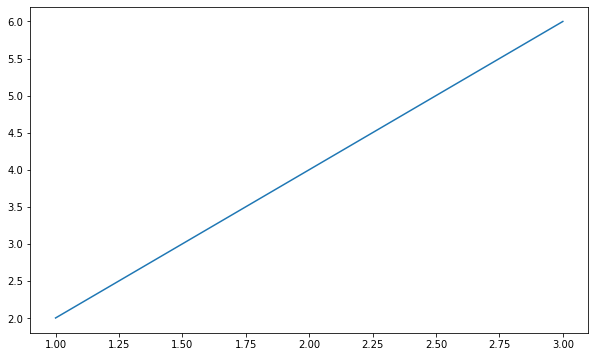

In [30]:
plt.figure(figsize= (10, 6))

plt.plot([1, 2, 3], [2,4,6])
plt.show()

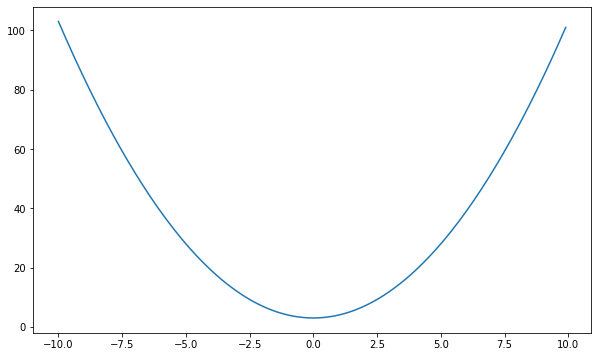

In [31]:
x = np.arange(-10, 10, .1)
y = x**2 + 3

plt.figure(figsize= (10,6))
plt.plot(x, y)
plt.show()

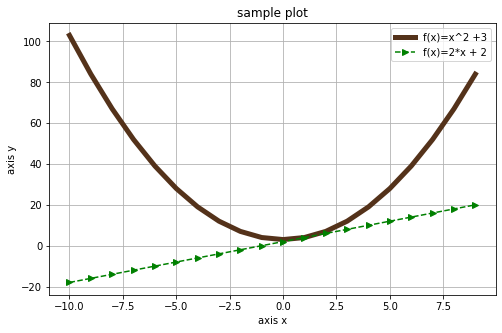

In [32]:
x = np.arange(-10, 10, 1)
y = x**2 + 3

y2 = 2*x + 2

plt.figure(figsize= (8,5))
plt.grid()

plt.plot(x, y, label="f(x)=x^2 +3", color="#54321A", lw=5)
plt.plot(x, y2, label="f(x)=2*x + 2", color = "green", ls="dashed", marker=">")

plt.legend()

plt.title("sample plot")

plt.xlabel("axis x")
plt.ylabel('axis y')
plt.show()

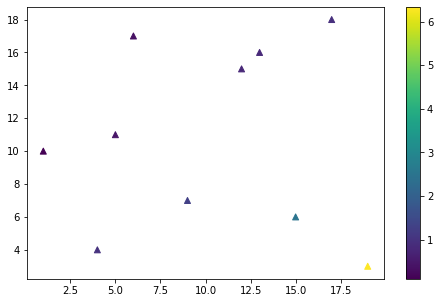

In [33]:
plt.figure(figsize= (8, 5))
x = np.random.randint(1,20, size=(10,))
y = np.random.randint(1, 20, size=(10,))

plt.scatter(x,y, marker='^', c=x/y)
plt.colorbar()

plt.show()

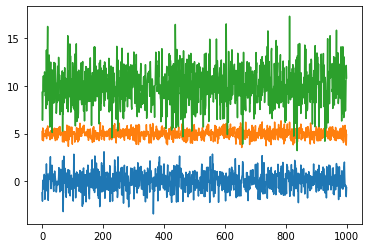

In [34]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')

plt.show()

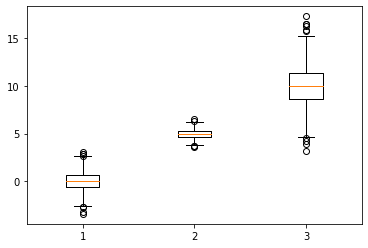

In [35]:
plt.boxplot((s1, s2, s3))
plt.show()

In [36]:
data_result.describe()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2219.720000,534.040000,113.920000,178.680000,249.920000,226.880000,267.360000,299.440000,349.480000,125.005429,401037.080000,389615.920000,11421.160000,58725.840000,3.347607,14.924472
std,967.646523,494.321798,85.577411,140.485385,285.271935,144.643908,160.365956,216.219618,218.601067,75.275402,128038.832784,129798.481698,8432.515366,16360.578539,2.656443,1.604396
min,858.000000,0.000000,0.000000,0.000000,21.000000,59.000000,21.000000,1.000000,9.000000,18.631397,136663.000000,126409.000000,2314.000000,23025.000000,0.685439,12.575949
25%,1586.000000,197.000000,66.000000,88.000000,87.000000,130.000000,155.000000,136.000000,195.000000,88.157895,324089.000000,314090.000000,4547.000000,51708.000000,0.999484,13.817306
50%,1935.000000,470.000000,99.000000,141.000000,134.000000,180.000000,254.000000,273.000000,328.000000,112.797282,403776.000000,397618.000000,10254.000000,59808.000000,2.757898,14.766852
75%,2775.000000,772.000000,155.000000,228.000000,241.000000,268.000000,326.000000,372.000000,448.000000,131.818182,463931.000000,459849.000000,15645.000000,70029.000000,4.735842,15.961573
max,5221.000000,1944.000000,387.000000,599.000000,1326.000000,609.000000,765.000000,933.000000,830.000000,322.222222,684338.000000,677489.000000,34076.000000,86062.000000,8.466550,18.814943


<BarContainer object of 10 artists>

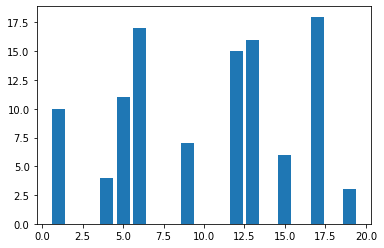

In [37]:
plt.bar(x, y)

<BarContainer object of 10 artists>

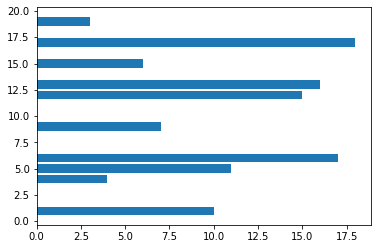

In [38]:
plt.barh(x, y)

In [39]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "C:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("OS not used")

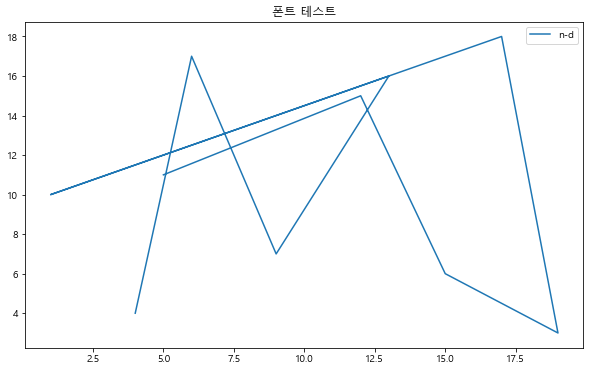

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label = 'n-d')
plt.title("폰트 테스트")
plt.legend()
plt.show()

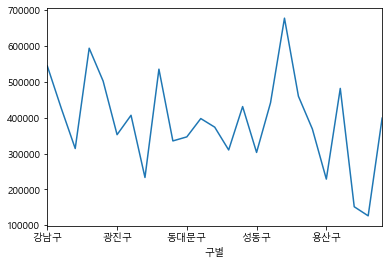

In [41]:
data_result['한국인'].plot()

In [42]:
x.sort()
x

array([ 1,  4,  5,  6,  9, 12, 13, 15, 17, 19])

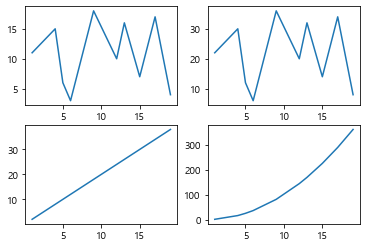

In [43]:
plt.subplot(2,2,1)
plt.plot(x, y)
plt.subplot(2,2,2)
plt.plot(x, 2*y)
plt.subplot(2,2,3)
plt.plot(x, 2*x)
plt.subplot(2,2,4)
plt.plot(x, x**2)


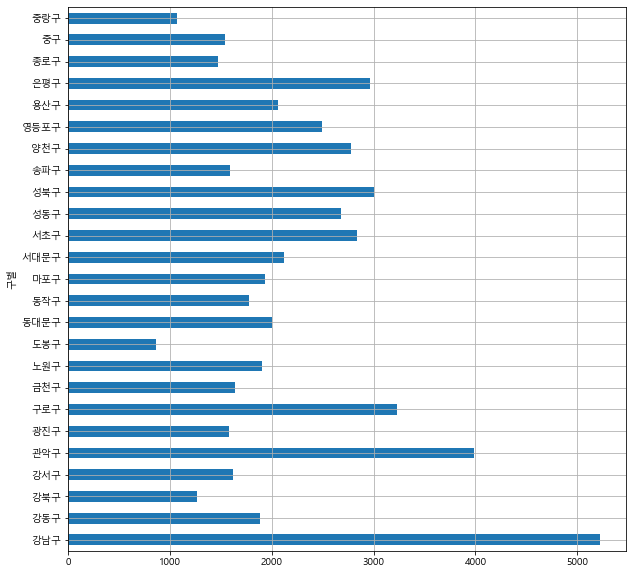

In [46]:
data_result['소계'].plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

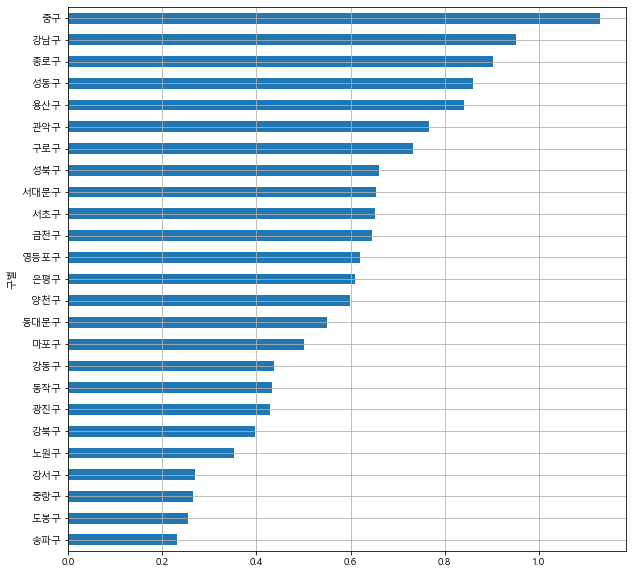

In [50]:
data_result['CCTV비율']=data_result['소계']/data_result['인구수']*100
data_result['CCTV비율'].sort_values().plot(kind='barh',grid=True,figsize=(10,10))
plt.show()

## 1-8. CCTV 현황그래프 분석 

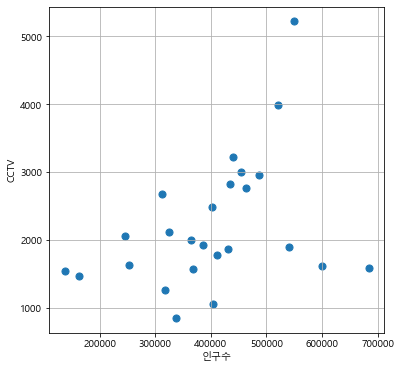

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [52]:
fp1=np.polyfit(data_result['인구수'],data_result['소계'],1)
fp1

array([2.86588167e-03, 1.07039518e+03])

In [53]:
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)

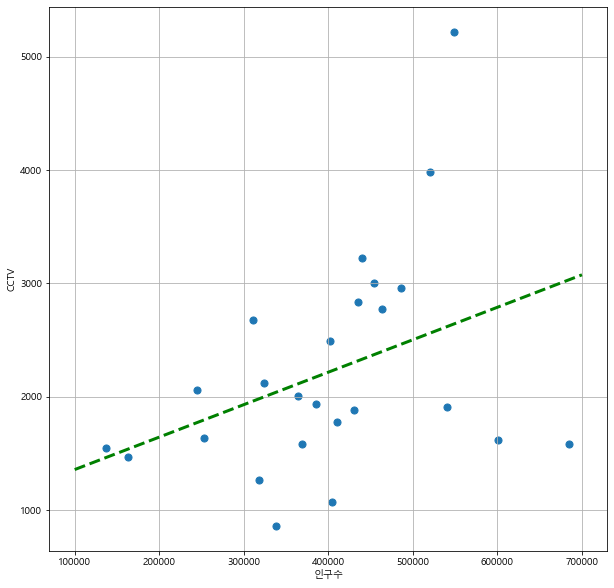

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'],data_result['소계'],s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [56]:
fp1=np.polyfit(data_result['인구수'],data_result['소계'],1)
f1=np.poly1d(fp1)
fx=np.linspace(100000,700000,100)
data_result['오차']=np.abs(data_result['소계']-f1(data_result['인구수']))

df_sort=data_result.sort_values(by='오차',ascending=False)
df_sort.head()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,,,,,,,,,
강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,80.970537,549043,544028,5015,70029,0.913408,12.754739,0.950927,2577.112547
송파구,1586,600.0,99.0,88.0,21,166,100,116,396,96.287129,684338,677489,6849,86062,1.000821,12.575949,0.231757,1445.626913
관악구,3985,430.0,56.0,419.0,487,609,619,694,671,186.278736,519953,502117,17836,74518,3.430310,14.331680,0.766415,1424.481045
도봉구,858,197.0,66.0,8.0,185,59,155,117,71,88.157895,337594,335280,2314,58070,0.685439,17.201135,0.254151,1179.899640
강서구,1617,219.0,155.0,118.0,230,187,190,264,254,123.961219,600240,593708,6532,82937,1.088231,13.817306,0.269392,1173.611997


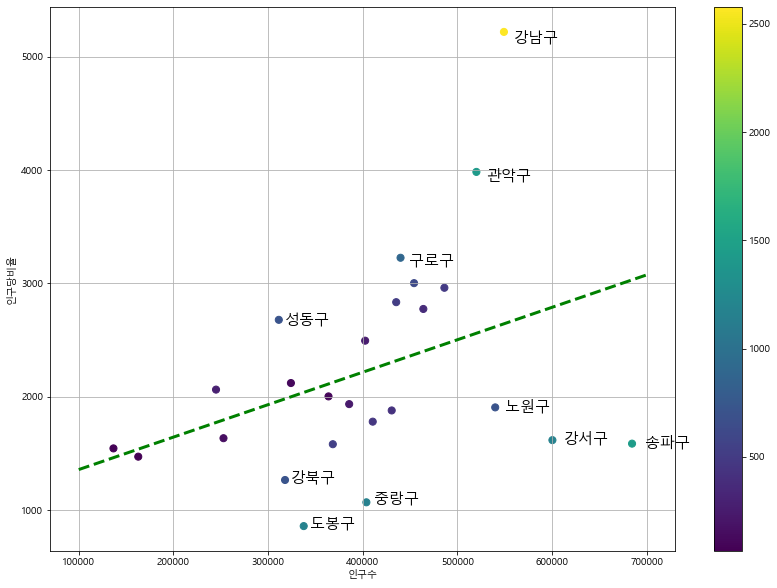

In [58]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'],data_result['소계'],
            c=data_result['오차'], s=50)
plt.plot(fx,f1(fx),ls='dashed',lw=3,color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n],fontsize=15)

plt.xlabel('인구수')
plt.ylabel('인구당비율')

plt.colorbar()
plt.grid()
plt.show()

In [61]:
# 상관관계를 보여주는 데이터 프레임
data_result.corr()['소계']

소계          1.000000
2011년 이전    0.734653
2012년       0.246687
2013년       0.465302
2014년       0.125848
2015년       0.684851
2016년       0.859368
2017년       0.579154
2018년       0.549010
최근증가율      -0.052459
인구수         0.379213
한국인         0.362795
외국인         0.173592
고령자         0.291487
외국인비율      -0.059791
고령자비율      -0.430011
CCTV비율      0.521399
오차          0.480848
Name: 소계, dtype: float64

In [62]:
data_result.corr()

,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
소계,1.000000,0.734653,0.246687,0.465302,0.125848,0.684851,0.859368,0.579154,0.549010,-0.052459,0.379213,0.362795,0.173592,0.291487,-0.059791,-0.430011,0.521399,0.480848
2011년 이전,0.734653,1.000000,0.299380,0.195048,-0.150815,0.243374,0.515050,0.233307,0.175296,-0.419820,0.353848,0.359224,-0.156583,0.274659,-0.288311,-0.376671,0.318711,0.432061
2012년,0.246687,0.299380,1.000000,0.039584,-0.390865,0.020095,0.203935,0.177430,0.169742,-0.028851,0.162092,0.161693,-0.027696,0.103463,-0.097527,-0.206453,0.128607,0.061266
2013년,0.465302,0.195048,0.039584,1.000000,-0.244656,0.553333,0.395899,0.313956,0.312640,0.125556,-0.110780,-0.128124,0.290078,-0.165256,0.354009,-0.031863,0.563302,0.059740
2014년,0.125848,-0.150815,-0.390865,-0.244656,1.000000,-0.014013,0.169840,-0.082278,-0.130577,-0.308480,0.096383,0.088776,0.096972,0.198454,-0.033181,0.156426,-0.078499,0.107847
2015년,0.684851,0.243374,0.020095,0.553333,-0.014013,1.000000,0.729651,0.449215,0.494722,0.428182,0.284476,0.266310,0.220263,0.219060,0.101645,-0.288395,0.396966,0.428685
2016년,0.859368,0.515050,0.203935,0.395899,0.169840,0.729651,1.000000,0.417621,0.453977,0.036079,0.344546,0.339381,0.007599,0.314685,-0.181332,-0.226214,0.406985,0.498170
2017년,0.579154,0.233307,0.177430,0.313956,-0.082278,0.449215,0.417621,1.000000,0.279511,0.269699,0.020798,0.000310,0.311015,-0.099625,0.178188,-0.386620,0.497761,0.231506
2018년,0.549010,0.175296,0.169742,0.312640,-0.130577,0.494722,0.453977,0.279511,1.000000,0.473749,0.298844,0.271312,0.361421,0.198653,0.130786,-0.415347,0.223809,0.070263
최근증가율,-0.052459,-0.419820,-0.028851,0.125556,-0.308480,0.428182,0.036079,0.269699,0.473749,1.000000,-0.297642,-0.317730,0.371310,-0.372511,0.508864,-0.046400,0.301165,-0.233694
